In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime

# 중요한 인사이트
    - 가격
    - 제품
    - 쇼게스트

In [2]:
file = pd.read_csv('df_train_final.csv')
answer = pd.read_excel('02_평가데이터\\2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx') 
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 20)

In [3]:
df = pd.DataFrame(file)

In [4]:
df.shape

(37372, 19)

In [5]:
df.index

RangeIndex(start=0, stop=37372, step=1)

In [6]:
df.columns # [방송일시 , 노출시간, 마더코드, 상품코드, 상품명, 상품군, 판매단가, 취급액, 요일, 
    # 계절 (12~2 : 겨울, 3~5: 봄 ...), 시청률평균, 기온, 강수량, 습도, 적설량, 미세먼지(최대값 267), 비온날(0 or 1), 눈온날(0 or 1) 

Index(['Unnamed: 0', 'date', 'exp_mins', 'mom_code', 'pd_code', 'pd_name',
       'pd_group', 'pd_price', 'sales', 'weekdays', 'seasons', 'rating',
       'temp', 'rain', 'humidity', 'snow', 'dust', 'is_rain', 'is_snow'],
      dtype='object')

In [7]:
df.head(50)

,Unnamed: 0,date,exp_mins,mom_code,pd_code,pd_name,pd_group,pd_price,sales,weekdays,seasons,rating,temp,rain,humidity,snow,dust,is_rain,is_snow
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,Tuesday,1,0.000000,-7.9,NaN,60.0,NaN,65.0,0,0
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,Tuesday,1,0.000000,-7.9,NaN,60.0,NaN,65.0,0,0
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,Tuesday,1,0.000000,-7.9,NaN,60.0,NaN,65.0,0,0
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,Tuesday,1,0.000000,-7.9,NaN,60.0,NaN,65.0,0,0
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,Tuesday,1,0.000000,-7.9,NaN,60.0,NaN,65.0,0,0
5,5,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,Tuesday,1,0.000000,-7.9,NaN,60.0,NaN,65.0,0,0
6,6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,Tuesday,1,0.000000,-7.7,NaN,58.0,NaN,49.0,0,0
7,7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,Tuesday,1,0.000000,-7.7,NaN,58.0,NaN,49.0,0,0
8,8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0,Tuesday,1,0.000000,-7.7,NaN,58.0,NaN,49.0,0,0
9,9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,Tuesday,1,0.000000,-7.7,NaN,57.0,NaN,39.0,0,0


In [8]:
answer_mom_code = set(answer['Unnamed: 2'])
answer_mom_code_df = pd.DataFrame(answer_mom_code)
answer_mom_code_df.columns = ['mom_code']
t = answer_mom_code_df.drop(index=0)
t

,mom_code
1,100034
2,100357
3,100358
4,100360
5,100361
6,100362
7,100363
8,100365
9,100379
10,100381


### 마더 코드에 따른 상품 분류

In [9]:
df_mom = pd.DataFrame(df[['mom_code', 'pd_name']])
df_mom.columns = ['mom_code', 'pd_name']
df_mom.sort_values('mom_code')
df_mom.iloc[1000:2000,:]

,mom_code,pd_name
1000,100293,무이자[가이거] 제니스시계 주얼리세트
1001,100808,CERINI by PAT 남성 소프트 기모 릴렉스팬츠
1002,100808,CERINI by PAT 남성 소프트 기모 릴렉스팬츠
1003,100808,CERINI by PAT 남성 소프트 기모 릴렉스팬츠
1004,100271,헤스티지 엘레나 라쿤양가죽 콤비 롱코트
1005,100271,헤스티지 엘레나 라쿤양가죽 콤비 롱코트
1006,100305,오모떼 360도 텐션업 레이스 패키지 시즌4
1007,100305,오모떼 360도 텐션업 레이스 패키지 시즌4
1008,100837,(도냄)무이자 쿠쿠전기밥솥 10인용
1009,100837,(도냄)일시불 쿠쿠전기밥솥 10인용


In [10]:
# temp_df = df_test.loc[df_test['mom_code']==100028,:]
# temp_df

## date value들 시계열로 변환

In [11]:
from datetime import datetime
date = df['date']
pd_date = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in date]

In [12]:
df['date'] = pd_date

In [13]:
new_df = df.set_index('date')
new_df['2019-01'].index

DatetimeIndex(['2019-01-01 06:00:00', '2019-01-01 06:00:00',
               '2019-01-01 06:20:00', '2019-01-01 06:20:00',
               '2019-01-01 06:40:00', '2019-01-01 06:40:00',
               '2019-01-01 07:00:00', '2019-01-01 07:20:00',
               '2019-01-01 07:40:00', '2019-01-01 08:00:00',
               ...
               '2019-01-31 21:40:00', '2019-01-31 21:40:00',
               '2019-01-31 21:40:00', '2019-01-31 21:40:00',
               '2019-01-31 22:00:00', '2019-01-31 22:00:00',
               '2019-01-31 22:20:00', '2019-01-31 22:20:00',
               '2019-01-31 22:40:00', '2019-01-31 22:40:00'],
              dtype='datetime64[ns]', name='date', length=2877, freq=None)

## 1월 미세먼지 상태 확인

In [14]:
df['dust'][0:100].min()

27.0

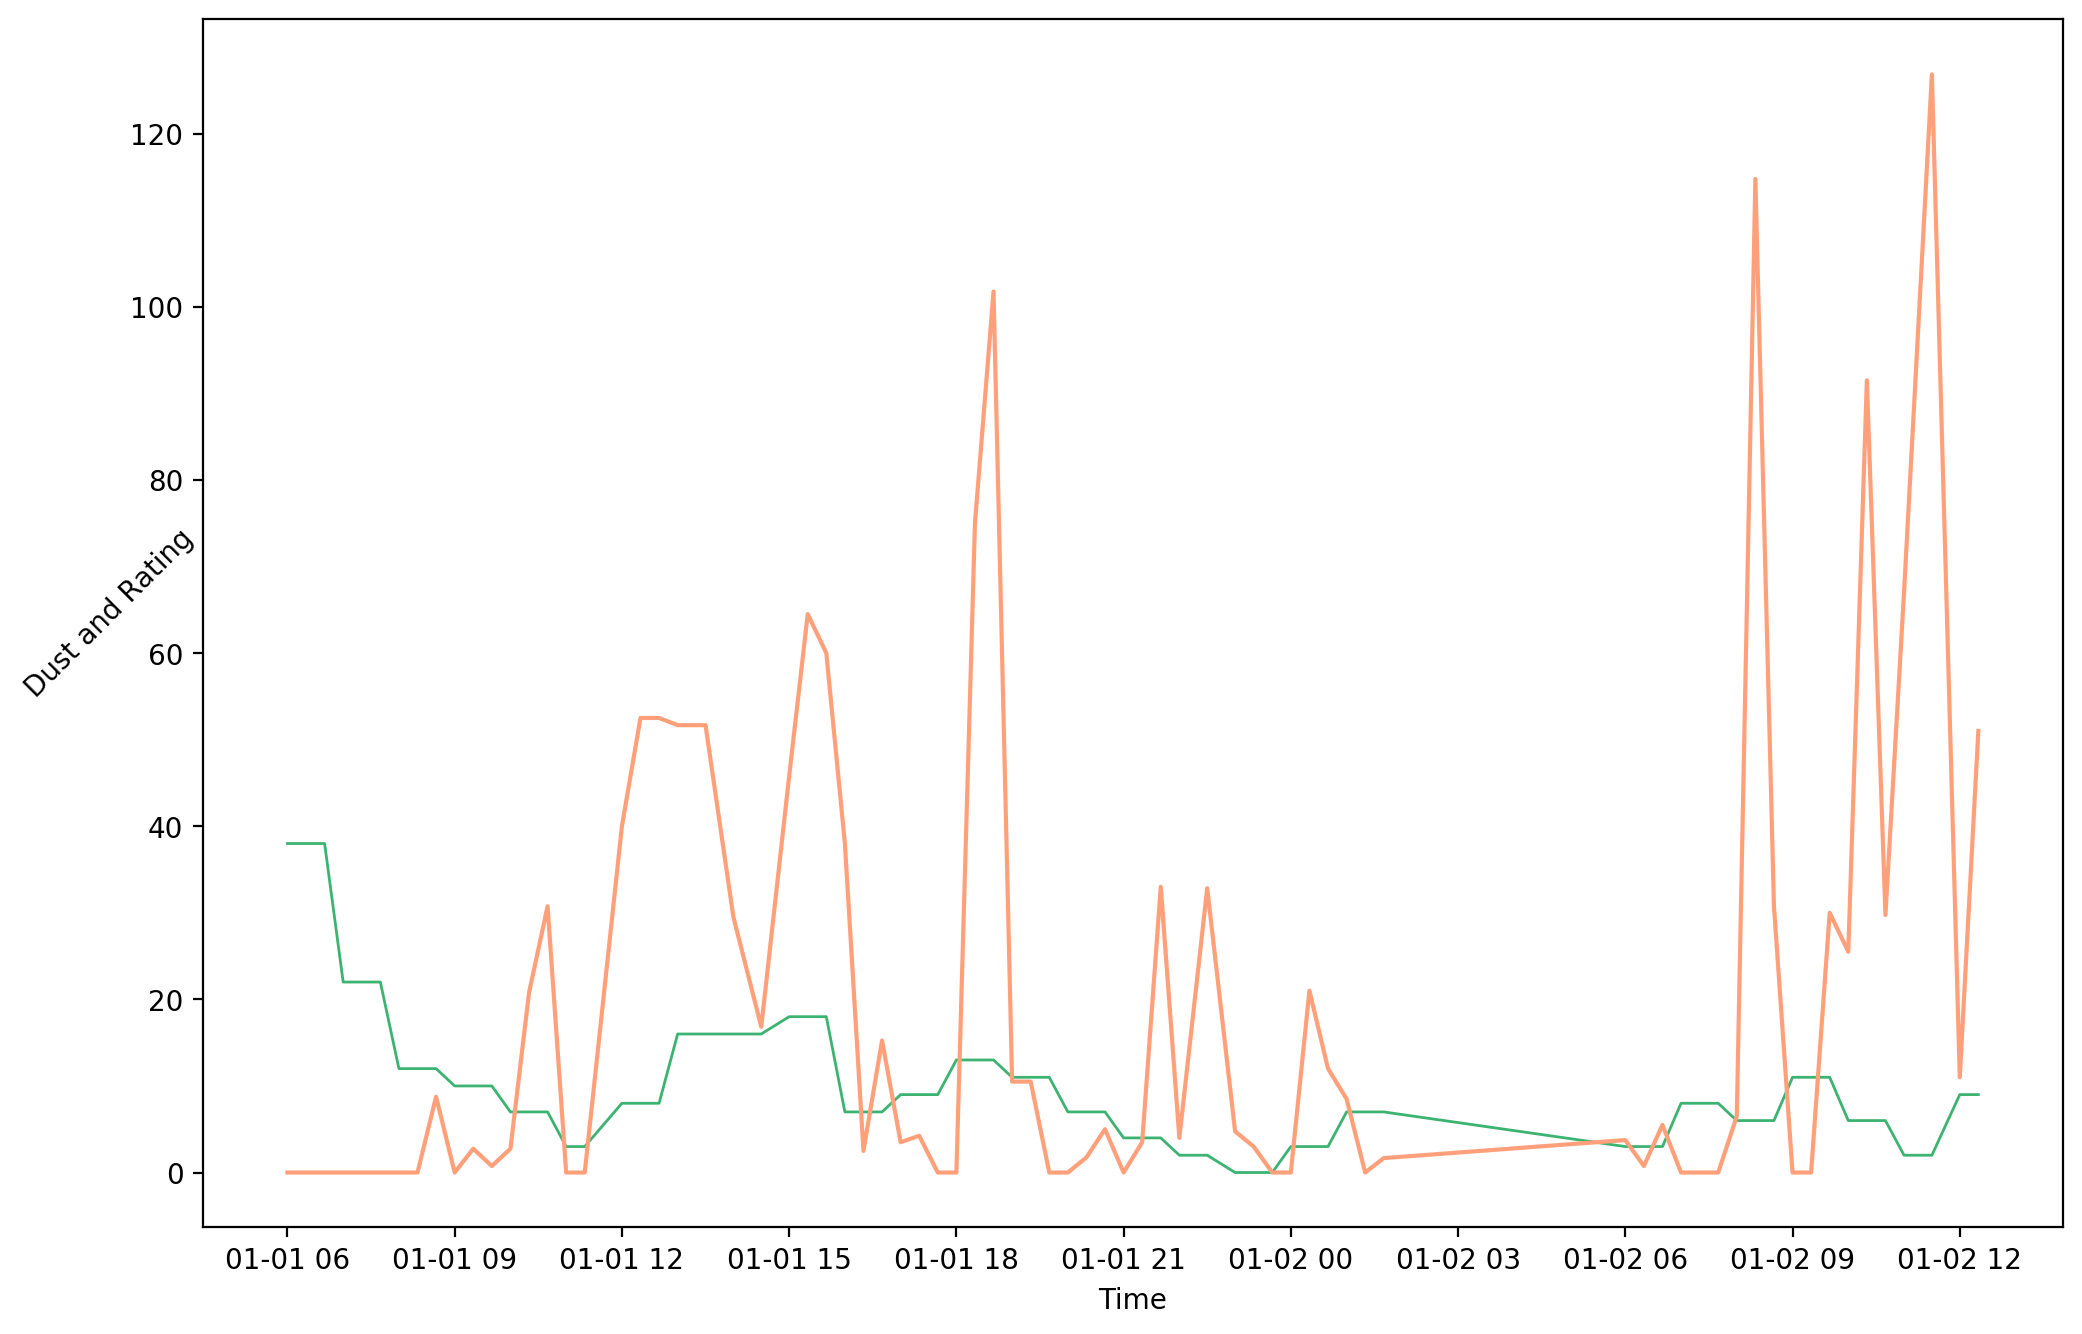

In [15]:
plt.figure(num=None, figsize=(12, 8), dpi=200, facecolor='w', edgecolor='k')
x = df['date'][0:100] # 1월은 2877
plt.plot(x, df['dust'][0:100]-27, c='mediumseagreen', linewidth=1)
plt.plot(x, df['rating'][0:100] * 5000, c='lightsalmon')
plt.xticks(fontsize=10)
plt.xlabel('Time')
plt.ylabel('Dust and Rating', rotation=45)
plt.show()

In [16]:
# seaborn countplot

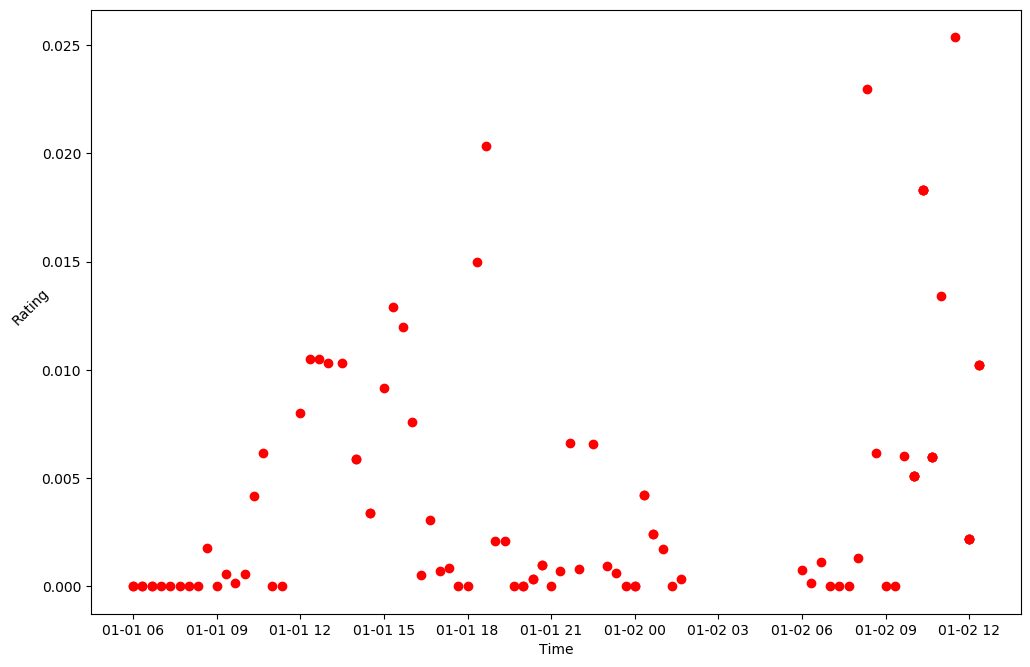

In [17]:
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
plt.plot(x, df['rating'][0:100], 'ro')
plt.xticks(fontsize=10)
plt.xlabel('Time')
plt.ylabel('Rating', rotation=45)
plt.show()

## 제품 카테고리 별 전체갯수 분포 확인

In [18]:
temp = new_df['2019-01'].drop_duplicates(['pd_group'], keep='first')
pd_group_1 = temp['pd_group']

In [19]:
temp = new_df.drop_duplicates(['pd_group'], keep='first')

In [20]:
new_df_pd_group = new_df['pd_group']

In [21]:
pd_df = new_df_pd_group.value_counts()
pd_df = pd.DataFrame(pd_df)
pd_df

,pd_group
주방,6604
가전,6479
의류,4340
속옷,3919
잡화,3891
농수축,3884
생활용품,2877
가구,2614
이미용,1305
건강기능,790


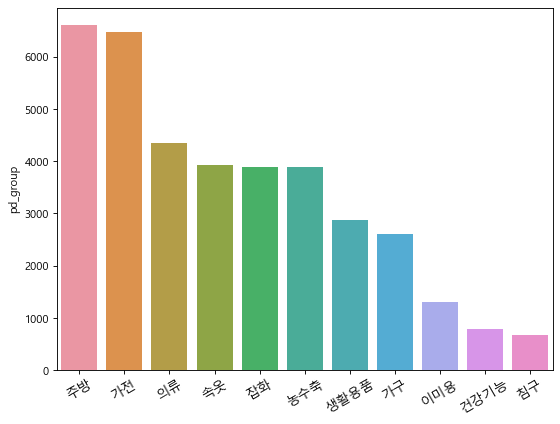

In [22]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(data=pd_df, x=pd_df.index, y=pd_df['pd_group'])
plt.xticks(rotation=30, fontsize=12)
plt.show()


### 시청률 관련 insight

In [23]:
# 취급액 https://plus.hankyung.com/apps/newsinside.view?aid=201710081733i&category=AA006&sns=
# https://news.joins.com/article/22016431

시청률은 크게 개인 시청률과 가구 시청률로 나뉘어지지만 일반적으로 시청률이라고 하면 가구 시청률을 가리킨다.
- 가구 시청률 = (특정 채널 시청 가구 수) / (총 TV 보유 가구 수)
- 개인 시청률 = (특정 채널 시청 개인 수) / (총 TV 보유 가구의 가구원 수)
     - 개인 시청률은 가구 시청률보다 집계하기 어렵다는 단점이 있어서 가구 시청률에 비해 많이 쓰이는 수치는 아니다.
- https://m.blog.naver.com/PostView.nhn?blogId=vnddua&logNo=220109676107&proxyReferer=https:%2F%2Fwww.google.com%2F : 시청률 관련 지상파와 케이블 설명

## 상품군 / 브랜드별로 seasonality가 존재할 것이다?
    - 오전 / 오후
    - Prime 시간대
    - 계절
    - 요일
    - 날씨

### 오전 / 오후 시간 먼저 정하기
- 시간값 확인
    - 예외 확인 2019-01-01 / 2019-12-31
    - 2019-01-01 06:00:00 ~ 23:40:00
    - 2019-12-31 00:00:00 ~ 23:40:00
    - 2020-01-01 00:00:00 4개
    - ex) 12/27
       - 00:00:00 ~ 02:00:00 까지(새벽) # min 00:00:00 max 02:00:00
       - 06:20:00 ~ 23:00:00 까지 # min 06:00:00 max 23:40:00
       - 일단 공통점은 02:00:00 부터 06:00:00 까지는 방송 편성 X
- 그렇다면 오전 오후 밤 심야 기준으로
    - 오전 : 06:00:00 ~ 12:00:00
    - 오후 : 12:00:00 ~ 18:00:00
    - 밤 : 18:00:00 ~ 00:00:00
    - 심야 : 00:00:00 ~ 02:00:00

In [59]:
df_test = df
df_test['date'] = pd.to_datetime(df_test['date'], format = "%Y-%m-%d %H:%M:%S", errors = 'raise')
df_test['pd_count'] = df_test['sales'] // df_test['pd_price']
df_test = df_test.astype({'pd_count':'int'})
df_test.iloc[32000:33000,:]

,Unnamed: 0,date,exp_mins,mom_code,pd_code,pd_name,pd_group,...,rain,humidity,snow,dust,is_rain,is_snow,pd_count
32000,32636,2019-11-05 10:20:00,20.000000,100734,202150,메디아글램 카이만엠보 소가죽 체인숄더백 (+클러치백+폼폼이),잡화,...,NaN,71.0,NaN,28.0,0,0,70
32001,32637,2019-11-05 10:40:00,20.000000,100734,202152,메디아글램 카이만엠보 소가죽 토트백 (+클러치백+폼폼이),잡화,...,NaN,71.0,NaN,28.0,0,0,235
32002,32638,2019-11-05 10:40:00,20.000000,100734,202150,메디아글램 카이만엠보 소가죽 체인숄더백 (+클러치백+폼폼이),잡화,...,NaN,71.0,NaN,28.0,0,0,312
32003,32639,2019-11-05 11:00:00,20.000000,100734,202152,메디아글램 카이만엠보 소가죽 토트백 (+클러치백+폼폼이),잡화,...,NaN,64.0,NaN,40.0,0,0,383
32004,32640,2019-11-05 11:00:00,20.000000,100734,202150,메디아글램 카이만엠보 소가죽 체인숄더백 (+클러치백+폼폼이),잡화,...,NaN,64.0,NaN,40.0,0,0,343
32005,32641,2019-11-05 11:20:00,20.000000,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,...,NaN,64.0,NaN,40.0,0,0,443
32006,32642,2019-11-05 11:40:00,20.000000,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,...,NaN,64.0,NaN,40.0,0,0,702
32007,32643,2019-11-05 12:00:00,20.000000,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,...,NaN,53.0,NaN,21.0,0,0,1095
32008,32644,2019-11-05 12:20:00,20.000000,100766,202239,참존 탑뉴스 지이링클 기초세트,이미용,...,NaN,53.0,NaN,21.0,0,0,599
32009,32645,2019-11-05 12:40:00,20.000000,100766,202239,참존 탑뉴스 지이링클 기초세트,이미용,...,NaN,53.0,NaN,21.0,0,0,970


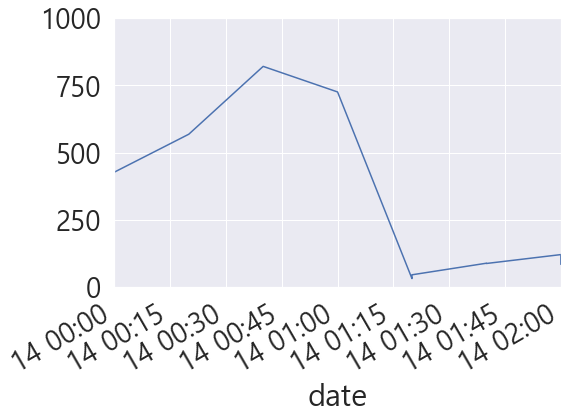

In [62]:
df_mom = pd.DataFrame(df_test[['date', 'mom_code', 'pd_name', 'pd_count']])
df_mom.columns = ['date', 'mom_code', 'pd_name', 'pd_count']
df_mom = df.set_index('date')
df_mom.sort_values('date')

# t = df_mom.loc['2019-08-01':'2019-09-30',:]
# t.loc[t['pd_group'] == '가전',:]
df_mom['pd_count'].plot(xlim=(['2019-11-14 00:00:00', '2019-11-14 02:00:00']), ylim=([0,1000]))



In [26]:
df_test.isnull().sum()

Unnamed: 0        0
date              0
exp_mins          0
mom_code          0
pd_code           0
pd_name           0
pd_group          0
pd_price          0
sales             0
weekdays          0
seasons           0
rating            0
temp              0
rain          33883
humidity          0
snow          37004
dust           2420
is_rain           0
is_snow           0
pd_count          0
dtype: int64

In [27]:
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['hour'] = df_test['date'].dt.hour
df_test['minute'] = df_test['date'].dt.minute
df_test['second'] = df_test['date'].dt.second
df_test['weekday'] = df_test['date'].dt.weekday

In [28]:
df_test['hour']

0         6
1         6
2         6
3         6
4         6
         ..
37367    23
37368     0
37369     0
37370     0
37371     0
Name: hour, Length: 37372, dtype: int64

In [29]:
# 여기서 시간대별로 수치화 시키면 오전 0, 오후 1, 밤 2, 심야 3 칼럼은 time_pie
# df['time_pie']
def category_temp(x):
    if x >= 6 and x < 12:
        return 0
    elif x >= 12 and x < 18:
        return 1
    elif x >= 18 and x < 24:
        return 2
    else:
        return 3
    
df_test['time_pie'] = df_test['hour'].apply(category_temp)

In [30]:
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import warnings
warnings.filterwarnings('ignore')

# 그래프에서 한글 폰트 깨지는 문제를 해결해주기 위한 코드
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~') 

In [31]:
group_time_df = df_test[['pd_group','time_pie']]

In [32]:
group_time_df

,pd_group,time_pie
0,의류,0
1,의류,0
2,의류,0
3,의류,0
4,의류,0
...,...,...
37367,주방,2
37368,주방,3
37369,주방,3
37370,주방,3


In [33]:
df_time_morning = pd.DataFrame(group_time_df.loc[group_time_df['time_pie']==0, ['pd_group','time_pie']])
df_time_morning['pd_group'].value_counts()
time_morning_counts = df_time_morning['pd_group'].value_counts()
time_morning_counts = pd.DataFrame(time_morning_counts)
time_morning_counts = time_morning_counts.reset_index()
time_morning_counts.columns = ['pd_category', 'pd_count']

In [34]:
df_time_afternoon = pd.DataFrame(group_time_df.loc[group_time_df['time_pie']==1, ['pd_group','time_pie']])
df_time_afternoon['pd_group'].value_counts()
time_afternoon_counts = df_time_afternoon['pd_group'].value_counts()
time_afternoon_counts = pd.DataFrame(time_afternoon_counts)
time_afternoon_counts = time_afternoon_counts.reset_index()
time_afternoon_counts.columns = ['pd_category', 'pd_count']

In [35]:
df_time_night = pd.DataFrame(group_time_df.loc[group_time_df['time_pie']==2, ['pd_group','time_pie']])
df_time_night['pd_group'].value_counts()
time_night_counts = df_time_night['pd_group'].value_counts()
time_night_counts = pd.DataFrame(time_night_counts)
time_night_counts = time_night_counts.reset_index()
time_night_counts.columns = ['pd_category', 'pd_count']

In [36]:
df_time_midnight = pd.DataFrame(group_time_df.loc[group_time_df['time_pie']==3, ['pd_group','time_pie']])
df_time_midnight['pd_group'].value_counts()
time_midnight_counts = df_time_midnight['pd_group'].value_counts()
time_midnight_counts = pd.DataFrame(time_midnight_counts)
time_midnight_counts = time_midnight_counts.reset_index()
time_midnight_counts.columns = ['pd_category', 'pd_count']

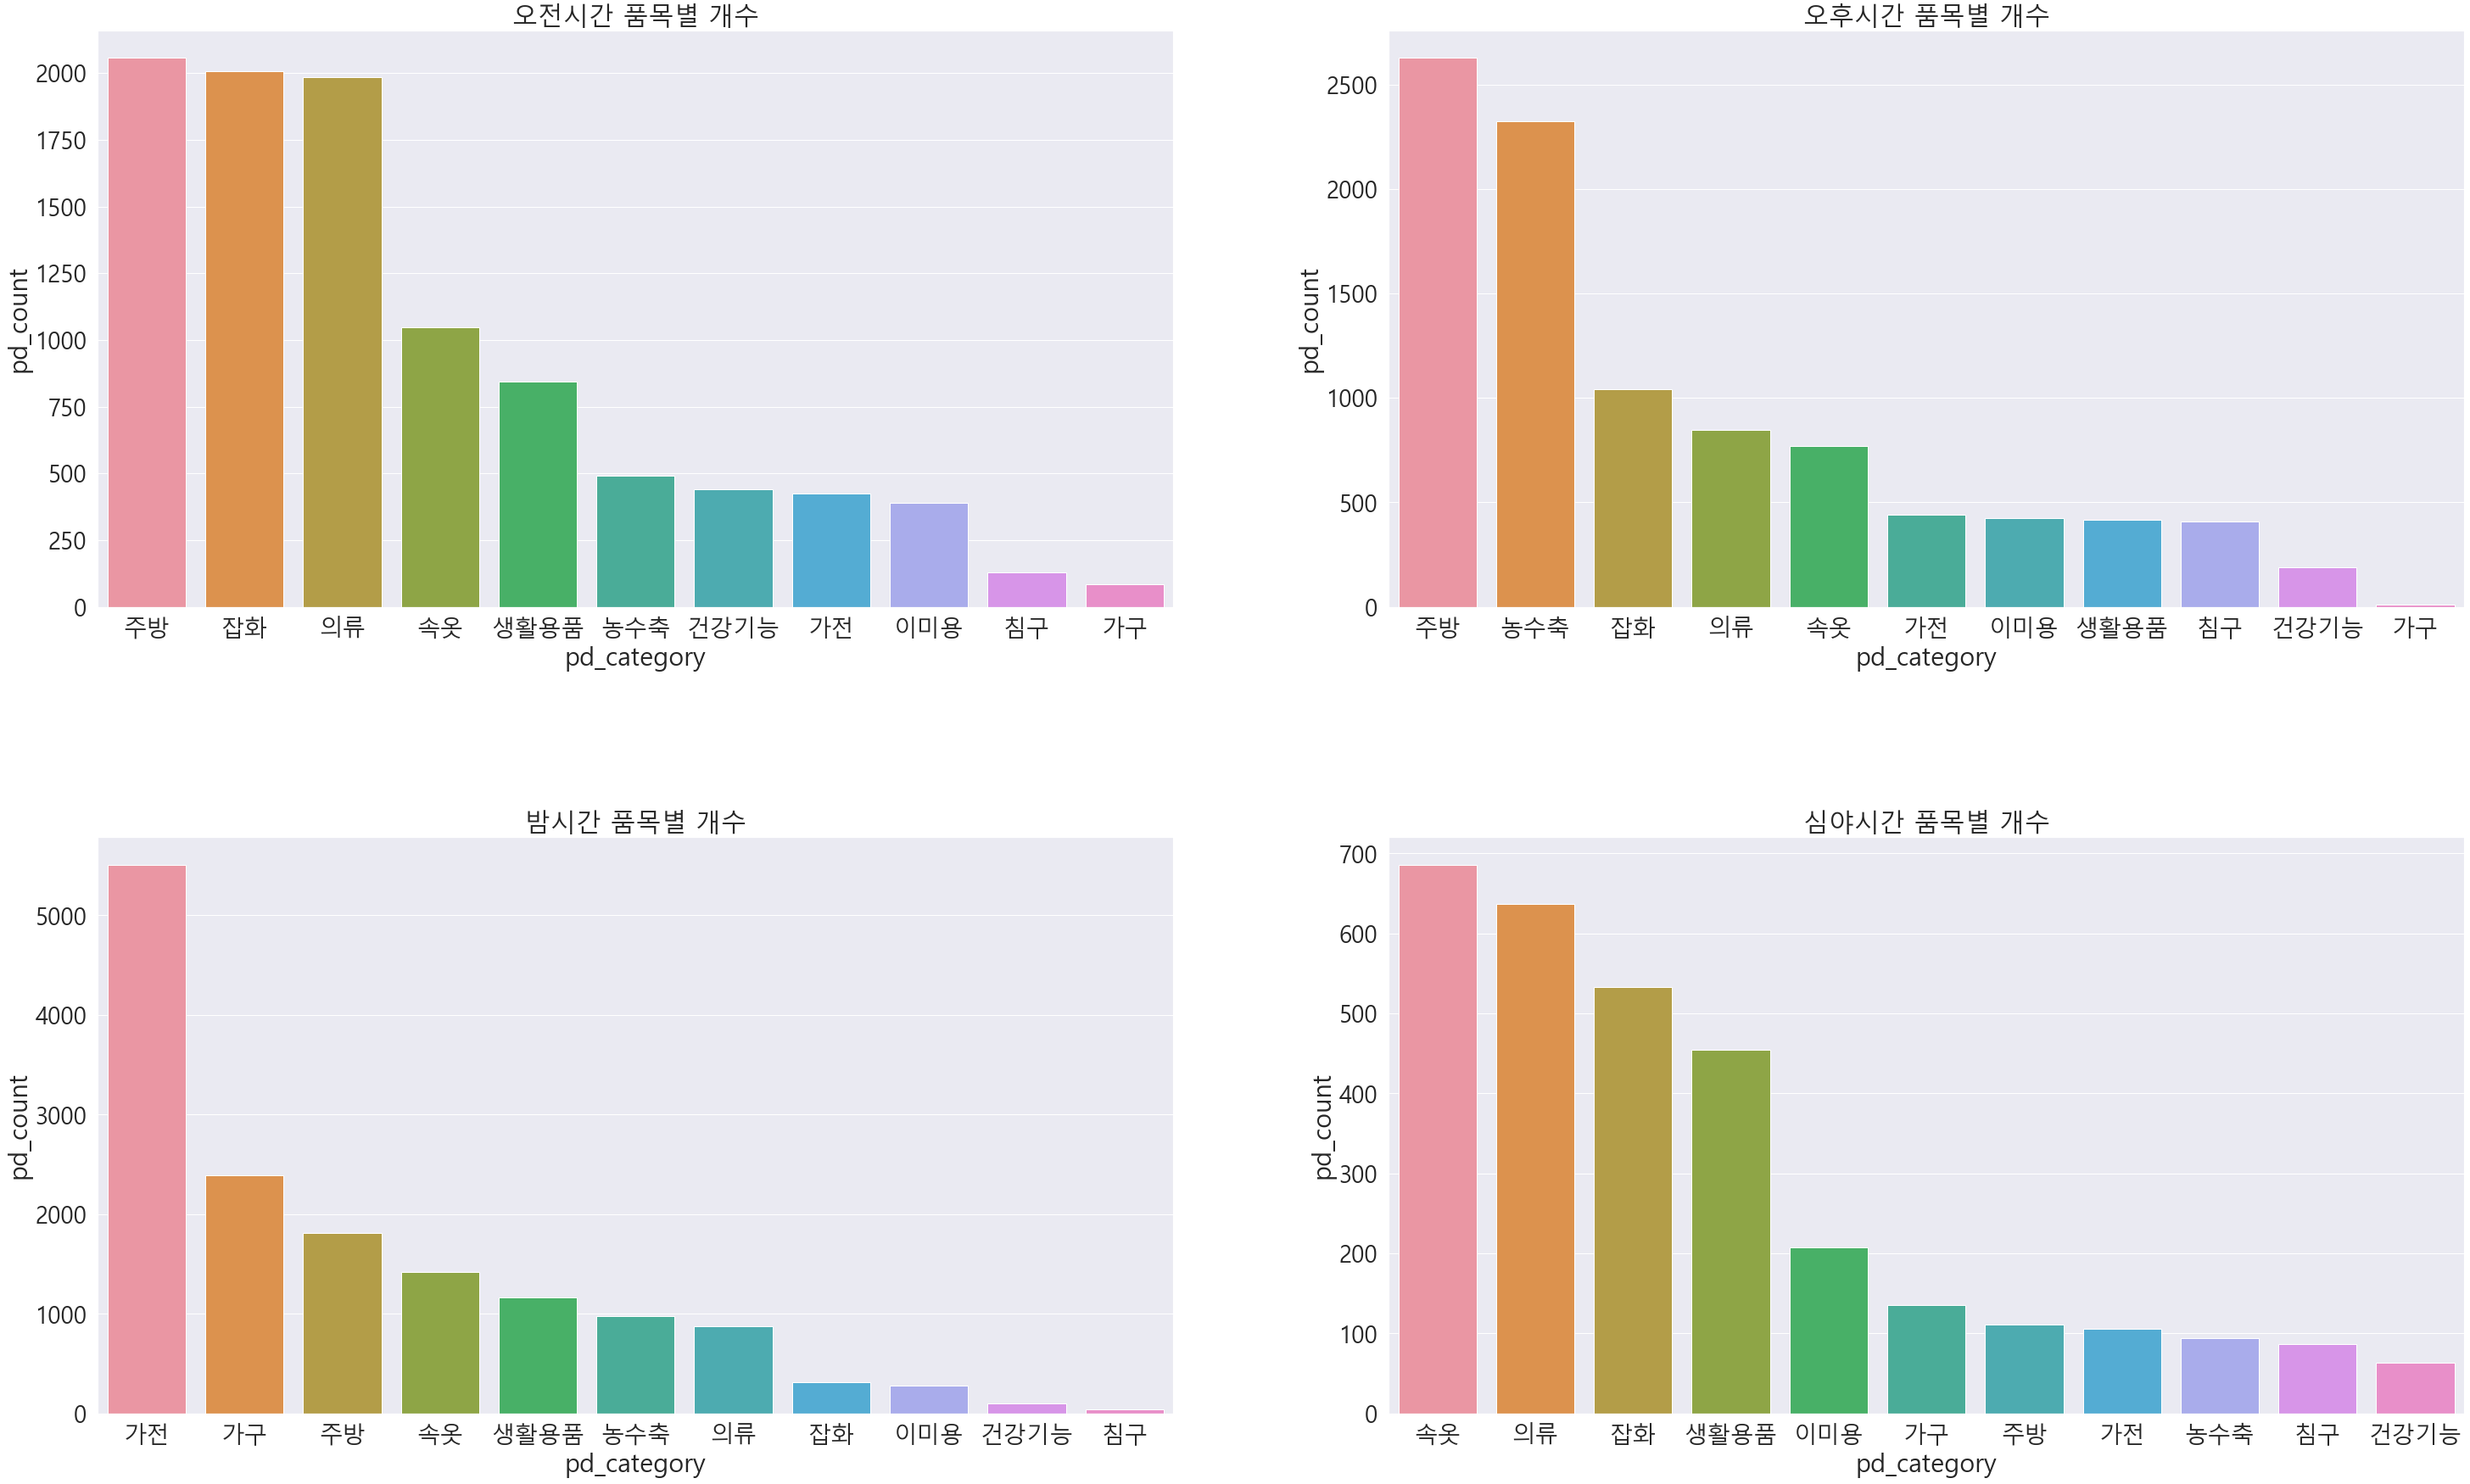

In [37]:
f, ax = plt.subplots(2, 2)
f.set_size_inches(50, 30) # 그래프 안의 변수 값들이 겹쳐보이는 것을 조정

sns.barplot(x = "pd_category", y = "pd_count", data = time_morning_counts, ax = ax[0, 0])
sns.barplot(x = "pd_category", y = "pd_count", data = time_afternoon_counts, ax = ax[0, 1])
sns.barplot(x = "pd_category", y = "pd_count", data = time_night_counts, ax = ax[1, 0])
sns.barplot(x = "pd_category", y = "pd_count", data = time_midnight_counts, ax = ax[1, 1])

ax[0, 0].set_title('오전시간 품목별 개수')
ax[0, 1].set_title('오후시간 품목별 개수')
ax[1, 0].set_title('밤시간 품목별 개수')
ax[1, 1].set_title('심야시간 품목별 개수')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

### 제품 군별 취급액 & 제품 군별 판매 수량

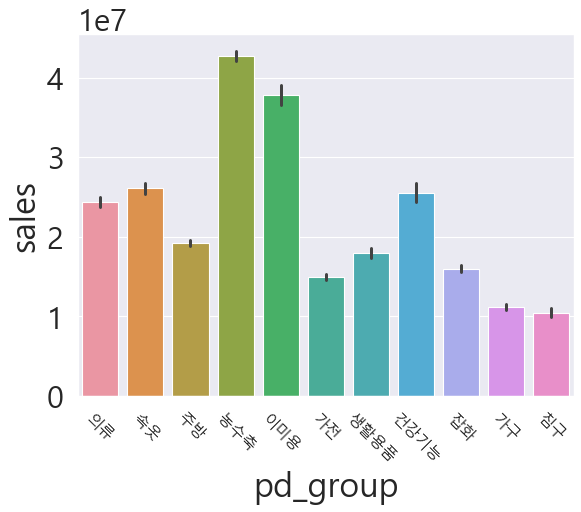

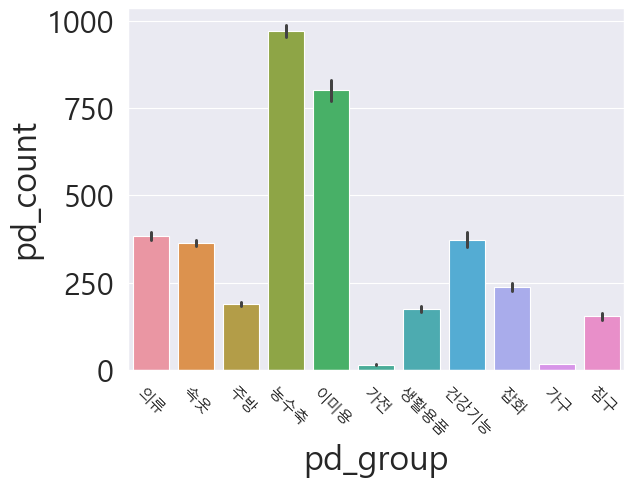

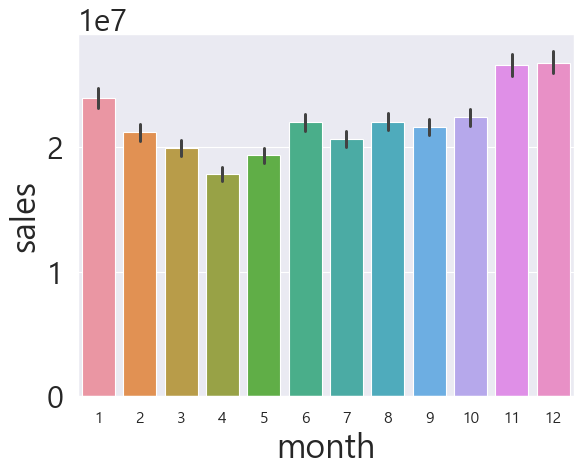

In [38]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.plot()
plt.xticks(rotation = - 45, fontsize = 14 )
ax = sns.barplot(x='pd_group',y='sales',data=df_test)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.plot()
plt.xticks(rotation = - 45, fontsize = 14 )
ax = sns.barplot(x='pd_group',y='pd_count',data=df_test)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.plot()
plt.xticks(fontsize = 14 )
ax = sns.barplot(x='month',y='sales',data=df_test)

### 오전 / 오후 / 밤 / 심야 별 상품 카테고리 개수(one-hot-encoding)

In [39]:
day_time_one_hot_encoded = pd.get_dummies(df_test.time_pie) 
day_time = pd.DataFrame(day_time_one_hot_encoded)

# 원래 데이터와 비교식으로 보여주기용 데이터프레임
time_pie_pd_group_compare_df = pd.concat(
[pd.DataFrame(df_test.pd_group), day_time_one_hot_encoded],
axis=1) 

In [40]:
time_pie_pd_group_compare_df = time_pie_pd_group_compare_df.set_index('pd_group')
time_pie_pd_group_compare_df.columns = ['오전', '오후', '밤', '심야']
time_pie_pd_group_compare_df

,오전,오후,밤,심야
pd_group,,,,
의류,1,0,0,0
의류,1,0,0,0
의류,1,0,0,0
의류,1,0,0,0
의류,1,0,0,0
...,...,...,...,...
주방,0,0,1,0
주방,0,0,0,1
주방,0,0,0,1


### Prime 시간대 분류하기(회의할 것)

### 계절별 품목 갯수 확인

In [41]:
group_weather_df = df_test[['pd_group','pd_name','seasons']]

In [42]:
group_weather_df

,pd_group,pd_name,seasons
0,의류,테이트 남성 셀린니트3종,1
1,의류,테이트 여성 셀린니트3종,1
2,의류,테이트 남성 셀린니트3종,1
3,의류,테이트 여성 셀린니트3종,1
4,의류,테이트 남성 셀린니트3종,1
...,...,...,...
37367,주방,일시불쿠첸압력밥솥 6인용,1
37368,주방,무이자쿠첸압력밥솥 10인용,1
37369,주방,일시불쿠첸압력밥솥 10인용,1
37370,주방,무이자쿠첸압력밥솥 6인용,1


In [43]:
group_weather_df['seasons'].value_counts()

2    10220
3     9493
4     8981
1     8678
Name: seasons, dtype: int64

In [44]:
df_season_spring = pd.DataFrame(group_weather_df.loc[group_weather_df['seasons']==1, ['pd_group','pd_name','seasons']])
df_season_spring['seasons'].value_counts()
spring_counts = df_season_spring['pd_group'].value_counts()
spring_counts = pd.DataFrame(spring_counts)
spring_counts = spring_counts.reset_index()
spring_counts.columns = ['pd_category','seasons']

In [45]:
df_season_summer = pd.DataFrame(group_weather_df.loc[group_weather_df['seasons']==2, ['pd_group','pd_name','seasons']])
df_season_summer['seasons'].value_counts()
summer_counts = df_season_summer['pd_group'].value_counts()
summer_counts = pd.DataFrame(summer_counts)
summer_counts = summer_counts.reset_index()
summer_counts.columns = ['pd_category','seasons']

In [46]:
df_season_fall = pd.DataFrame(group_weather_df.loc[group_weather_df['seasons']==3, ['pd_group','pd_name','seasons']])
df_season_fall['seasons'].value_counts()
fall_counts = df_season_fall['pd_group'].value_counts()
fall_counts = pd.DataFrame(fall_counts)
fall_counts =fall_counts.reset_index()
fall_counts.columns = ['pd_category','seasons']

In [47]:
df_season_winter = pd.DataFrame(group_weather_df.loc[group_weather_df['seasons']==4, ['pd_group','pd_name','seasons']])
df_season_winter['seasons'].value_counts()
winter_counts = df_season_winter['pd_group'].value_counts()
winter_counts = pd.DataFrame(winter_counts)
winter_counts = winter_counts.reset_index()
winter_counts.columns = ['pd_category','seasons']

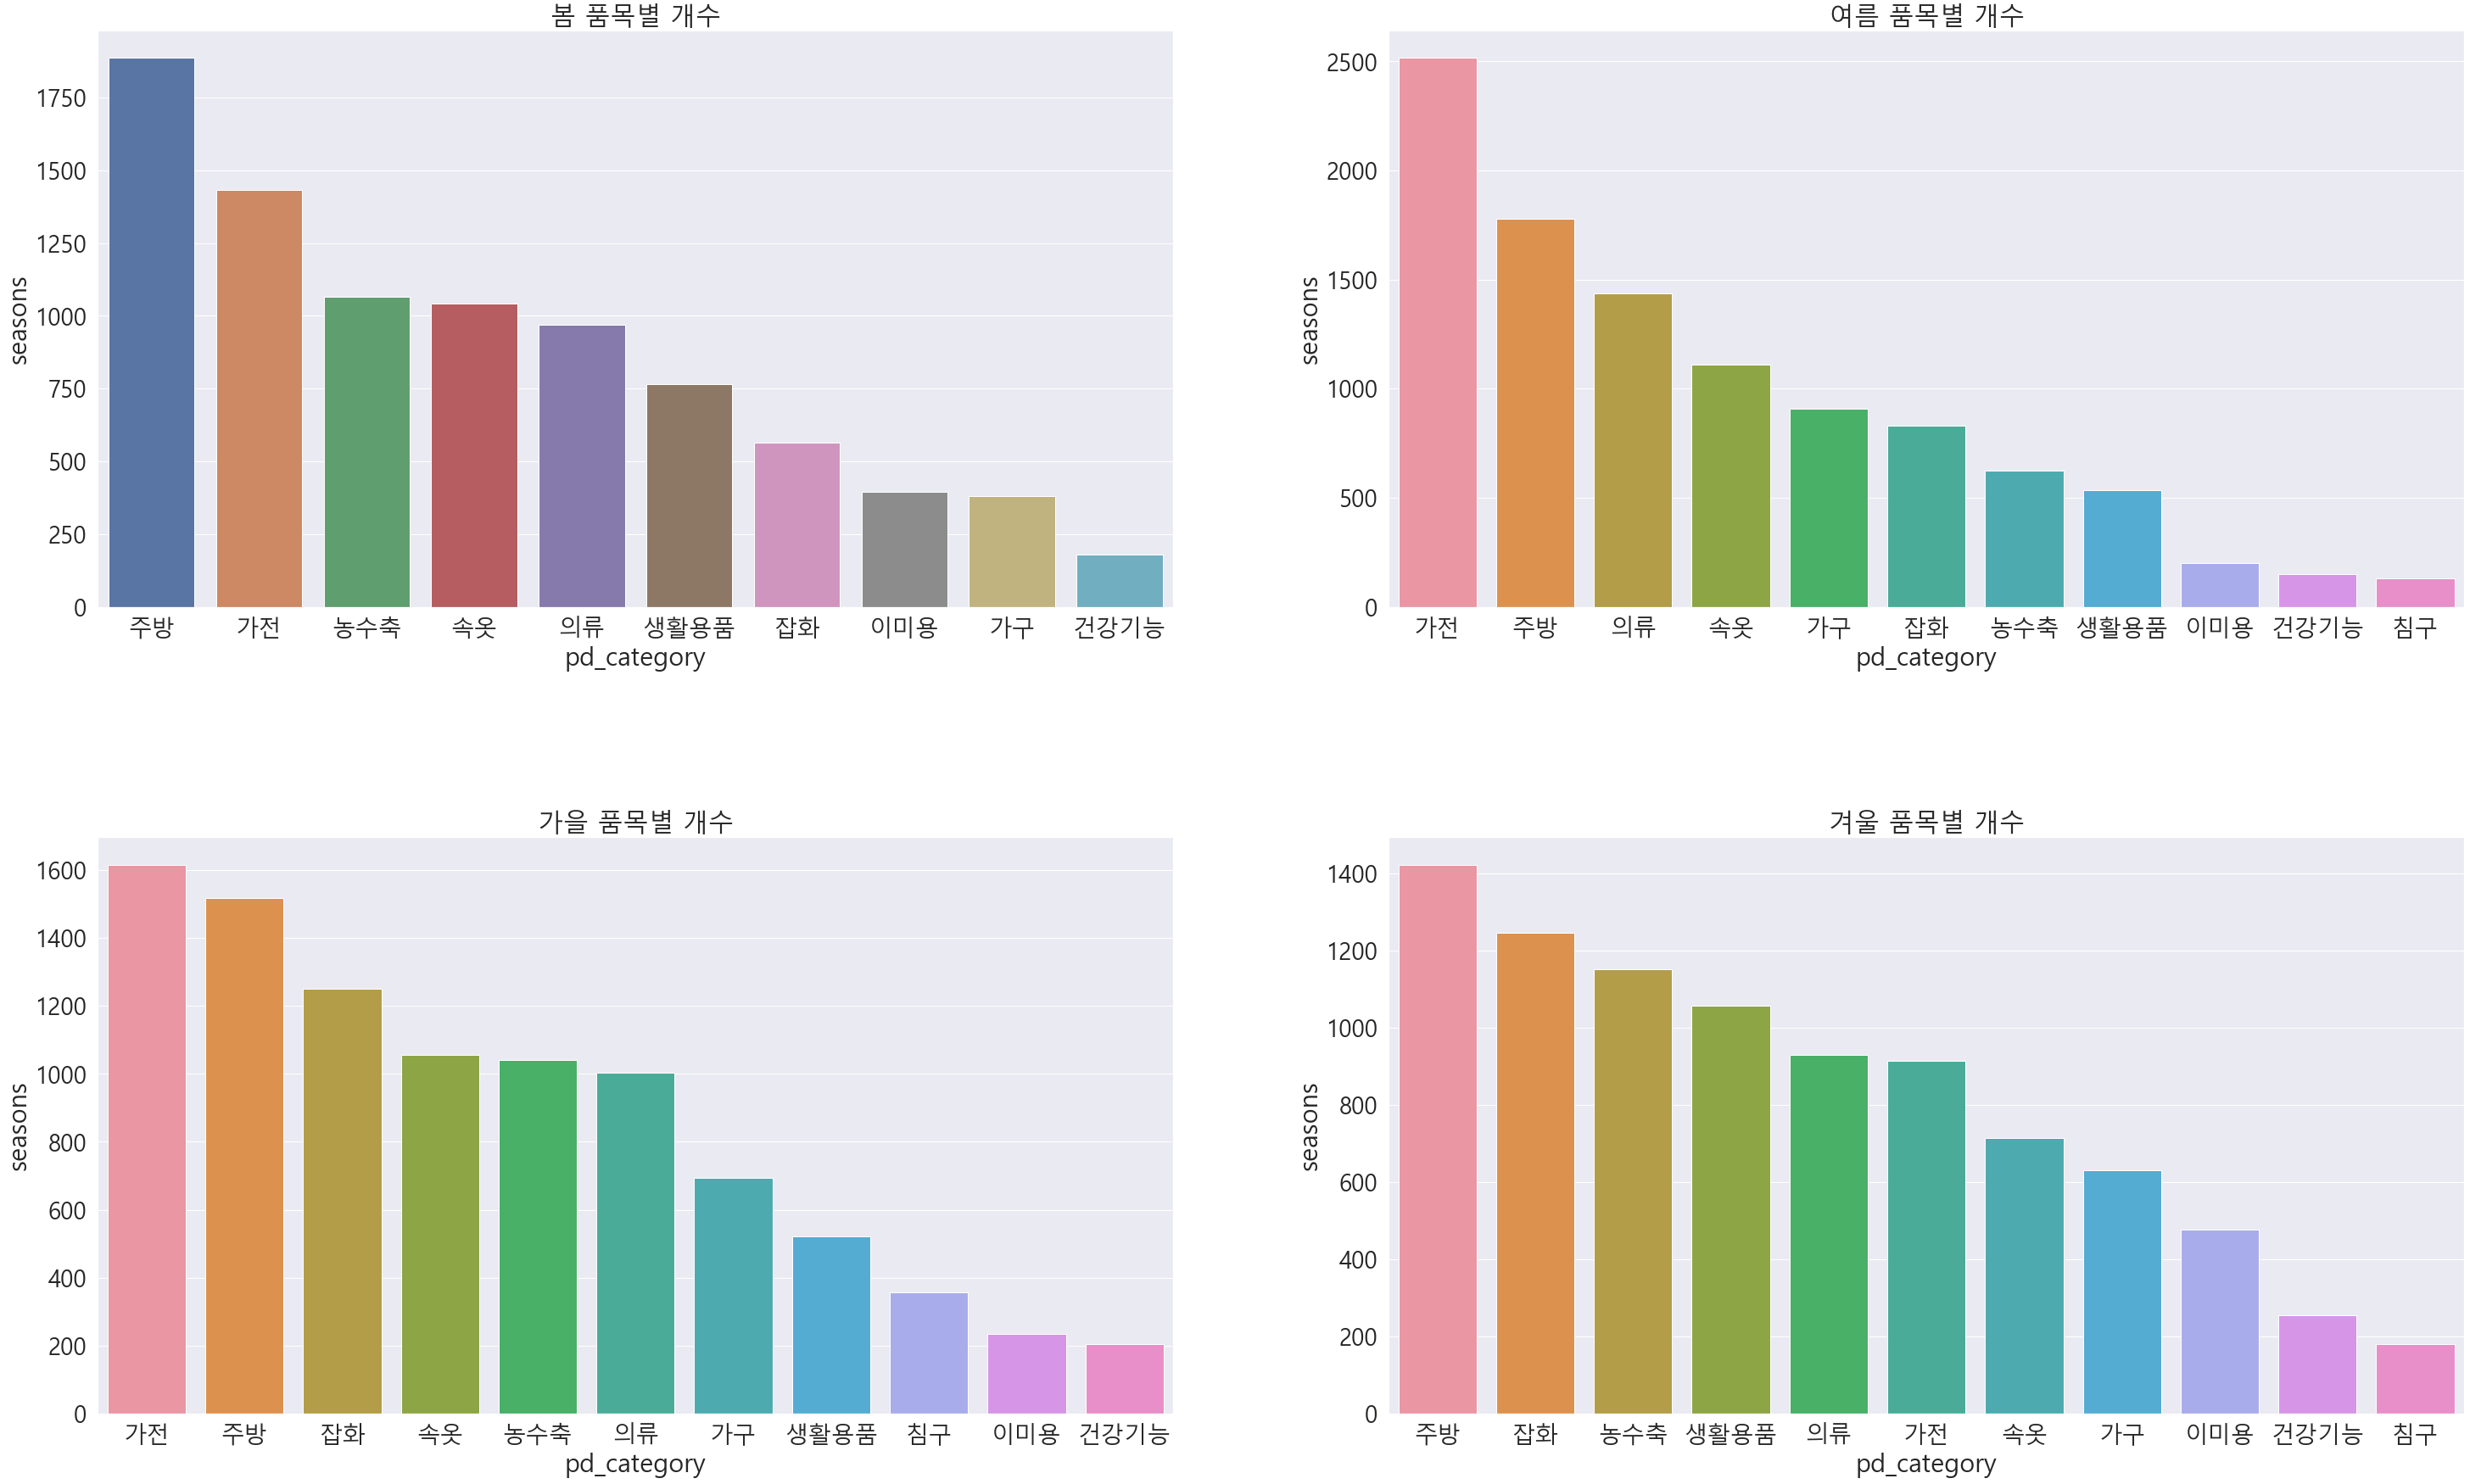

In [48]:
f, ax = plt.subplots(2, 2)
f.set_size_inches(50, 30) # 그래프 안의 변수 값들이 겹쳐보이는 것을 조정

sns.barplot(x = "pd_category", y = "seasons", data = spring_counts, ax = ax[0, 0])
sns.barplot(x = "pd_category", y = "seasons", data = summer_counts, ax = ax[0, 1])
sns.barplot(x = "pd_category", y = "seasons", data = fall_counts, ax = ax[1, 0])
sns.barplot(x = "pd_category", y = "seasons", data = winter_counts, ax = ax[1, 1])

ax[0, 0].set_title('봄 품목별 개수')
ax[0, 1].set_title('여름 품목별 개수')
ax[1, 0].set_title('가을 품목별 개수')
ax[1, 1].set_title('겨울 품목별 개수')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

### 시즌별 주방 품목 상품명 확인

In [49]:
x = pd.DataFrame(df_test.loc[df_test['seasons']==1,['mom_code','pd_group','pd_name','seasons','time_pie','pd_price','sales','pd_count']])
pd.set_option('display.max_row', 2000)
pd.set_option('display.max_columns', 15)
# y = x.loc[x['pd_group']=='농수축']
# z = y.loc[y['time_pie']==2]
print(x['mom_code'].shape)
print(len(set(x['mom_code'])))

(8678,)
304


봄 가전 세탁기가 판매량 압도적

오전(주방)
    - 냄비세트
    - 압력밥솥
    - 가스레인지
    - 에어프라이어
    - 분쇄믹서기
    - 전기밥솥
    - 티메이커
    - 원목도마
    - 실버팬
    - 행주티슈
    - 밀폐용기
    - 양면그릴
    - 프라이팬 세트
    - 멀티쿡
    - 가마솥 세트
    - 보온병 세트
    - 티포트
오후(주방)
    - 냄비세트
    - 가스레인지
    - 전기밥솥
    - 분쇄믹서기
    - 에어프라이
    - 냄비세트
    - 압력밥솥
    - 프라이팬 세트
    - 인덕션
    - 티포트
    - 멀티포트

봄철 오전 / 오후 시간대의 주방 품목차이는 거의 없고 중복된 값들이 많음

밤 시간대만 확인
봄철 가전
    - 세탁기
    - 냉장고
    - TV(많은편)
    - 노트북
    - 건조기
여름철 가전
    - 봄철 목록들 고르게 분포
    - 무선청소기
    - 에어컨(많은편)
    - 의류관리기
겨울철 가전
    - 냉장고
    - 세탁기
    - TV
    - 청소기

## 요일별 품목별 개수

In [50]:
group_weekdays_df = df_test[['pd_group','pd_name','weekdays']]

In [51]:
group_weekdays_df.weekdays.value_counts()

Sunday       5568
Wednesday    5440
Tuesday      5421
Thursday     5312
Monday       5237
Friday       5212
Saturday     5182
Name: weekdays, dtype: int64

In [52]:
sales = df_test[df_test['sales'].isin([0]) ]

In [53]:
sales

,Unnamed: 0,date,exp_mins,mom_code,pd_code,pd_name,pd_group,...,month,day,hour,minute,second,weekday,time_pie
